In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("user_behavior_dataset.csv")

In [3]:
df.sample(5)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
40,41,Xiaomi Mi 11,Android,240,4.7,1464,52,708,56,Female,3
443,444,iPhone 12,iOS,231,4.0,1664,48,724,29,Female,3
408,409,Samsung Galaxy S21,Android,357,7.8,2289,74,1242,22,Female,4
178,179,Xiaomi Mi 11,Android,207,5.7,1582,52,692,38,Male,3
440,441,Google Pixel 5,Android,260,5.7,1725,56,920,36,Female,3


In [4]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [5]:
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df["Device Model"].unique()

array(['Google Pixel 5', 'OnePlus 9', 'Xiaomi Mi 11', 'iPhone 12',
       'Samsung Galaxy S21'], dtype=object)

In [10]:
df.dtypes

User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object

In [12]:
df.shape

(700, 11)

In [13]:
df.Age.unique()

array([40, 47, 42, 20, 31, 21, 34, 24, 57, 43, 49, 39, 44, 26, 29, 45, 23,
       37, 58, 52, 33, 55, 19, 25, 38, 56, 18, 22, 27, 54, 53, 30, 28, 50,
       51, 41, 32, 35, 36, 59, 48, 46], dtype=int64)

In [14]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [30]:
df["Number of Apps Installed"].unique()

array([67, 42, 32, 56, 58, 35, 66, 82, 75, 17, 47, 65, 43, 53, 84, 41, 16,
       89, 37, 46, 59, 38, 77, 78, 44, 55, 14, 81, 19, 30, 93, 74, 52, 83,
       39, 21, 96, 97, 25, 90, 61, 28, 10, 64, 85, 87, 48, 57, 98, 11, 29,
       99, 22, 63, 31, 24, 72, 73, 91, 18, 15, 45, 12, 26, 33, 76, 34, 13,
       49, 71, 68, 69, 94, 92, 36, 79, 88, 27, 51, 23, 86, 95, 50, 70, 54,
       62], dtype=int64)

#   stat. Data

In [22]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,700.0,350.500000,202.216880,1.0,175.75,350.5,525.25,700.0
App Usage Time (min/day),700.0,271.128571,177.199484,30.0,113.25,227.5,434.25,598.0
Screen On Time (hours/day),700.0,5.272714,3.068584,1.0,2.50,4.9,7.40,12.0
Battery Drain (mAh/day),700.0,1525.158571,819.136414,302.0,722.25,1502.5,2229.50,2993.0
Number of Apps Installed,700.0,50.681429,26.943324,10.0,26.00,49.0,74.00,99.0
Data Usage (MB/day),700.0,929.742857,640.451729,102.0,373.00,823.5,1341.00,2497.0
Age,700.0,38.482857,12.012916,18.0,28.00,38.0,49.00,59.0
User Behavior Class,700.0,2.990000,1.401476,1.0,2.00,3.0,4.00,5.0


<Axes: >

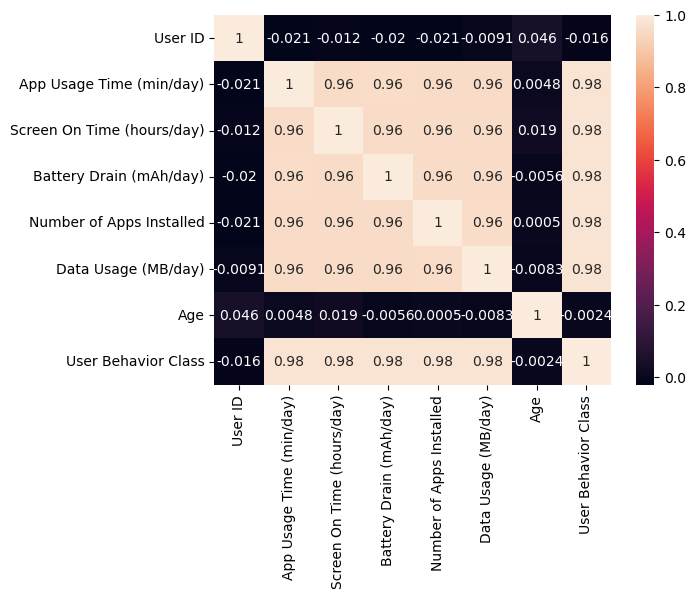

In [38]:
sns.heatmap(df.corr(method="spearman", numeric_only=True), annot=True)

In [21]:
df[["Number of Apps Installed", "Gender"]].groupby("Gender").sum()

,Number of Apps Installed
Gender,
Female,16876
Male,18601


In [26]:
df[["Number of Apps Installed", "Gender"]].groupby("Gender").median()

,Number of Apps Installed
Gender,
Female,49.0
Male,49.5


In [25]:
df[["Number of Apps Installed", "Operating System"]].groupby("Operating System").median()

,Number of Apps Installed
Operating System,
Android,48.0
iOS,52.0


In [29]:
df[["Screen On Time (hours/day)", "Gender"]].groupby("Gender").mean()

,Screen On Time (hours/day)
Gender,
Female,5.261310
Male,5.283242


In [47]:
df.groupby("User Behavior Class").median(numeric_only=True)

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age
User Behavior Class,,,,,,,
1,339.0,64.0,1.5,456.0,15.0,202.0,37.0
2,382.0,131.5,3.1,894.5,31.5,450.0,39.0
3,360.0,229.0,4.9,1512.0,49.0,828.0,38.0
4,334.0,405.0,6.9,2102.0,69.0,1209.0,40.0
5,361.5,540.0,10.3,2717.5,89.0,1935.0,37.0


array([67, 42, 32, 56, 58, 35, 66, 82, 75, 17, 47, 65, 43, 53, 84, 41, 16,
       89, 37, 46, 59, 38, 77, 78, 44, 55, 14, 81, 19, 30, 93, 74, 52, 83,
       39, 21, 96, 97, 25, 90, 61, 28, 10, 64, 85, 87, 48, 57, 98, 11, 29,
       99, 22, 63, 31, 24, 72, 73, 91, 18, 15, 45, 12, 26, 33, 76, 34, 13,
       49, 71, 68, 69, 94, 92, 36, 79, 88, 27, 51, 23, 86, 95, 50, 70, 54,
       62], dtype=int64)

#   Some Visualization

<Axes: xlabel='Operating System', ylabel='Count'>

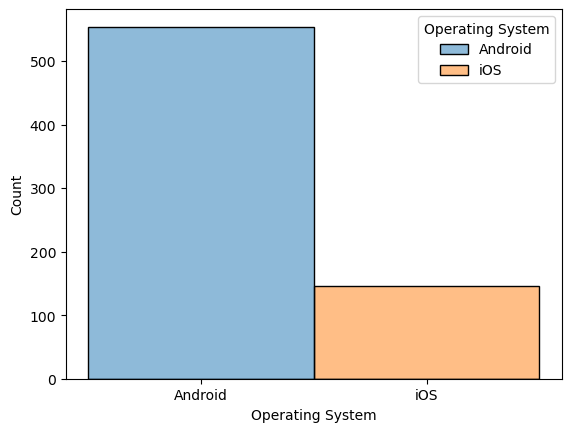

In [20]:
sns.histplot(data=df, x="Operating System", hue="Operating System")

In [ ]:
sns.histplot(data=df[["Number of Apps Installed", "Gender"]], x="Operating System", hue="Operating System")

<Axes: xlabel='User Behavior Class', ylabel='Screen On Time (hours/day)'>

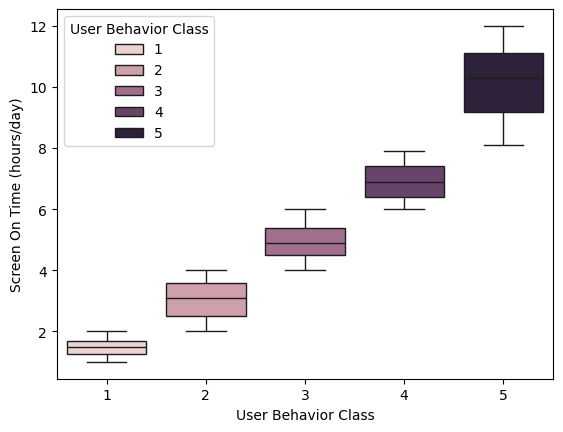

In [58]:
sns.boxplot(data=df, y="Screen On Time (hours/day)", x="User Behavior Class", hue="User Behavior Class")

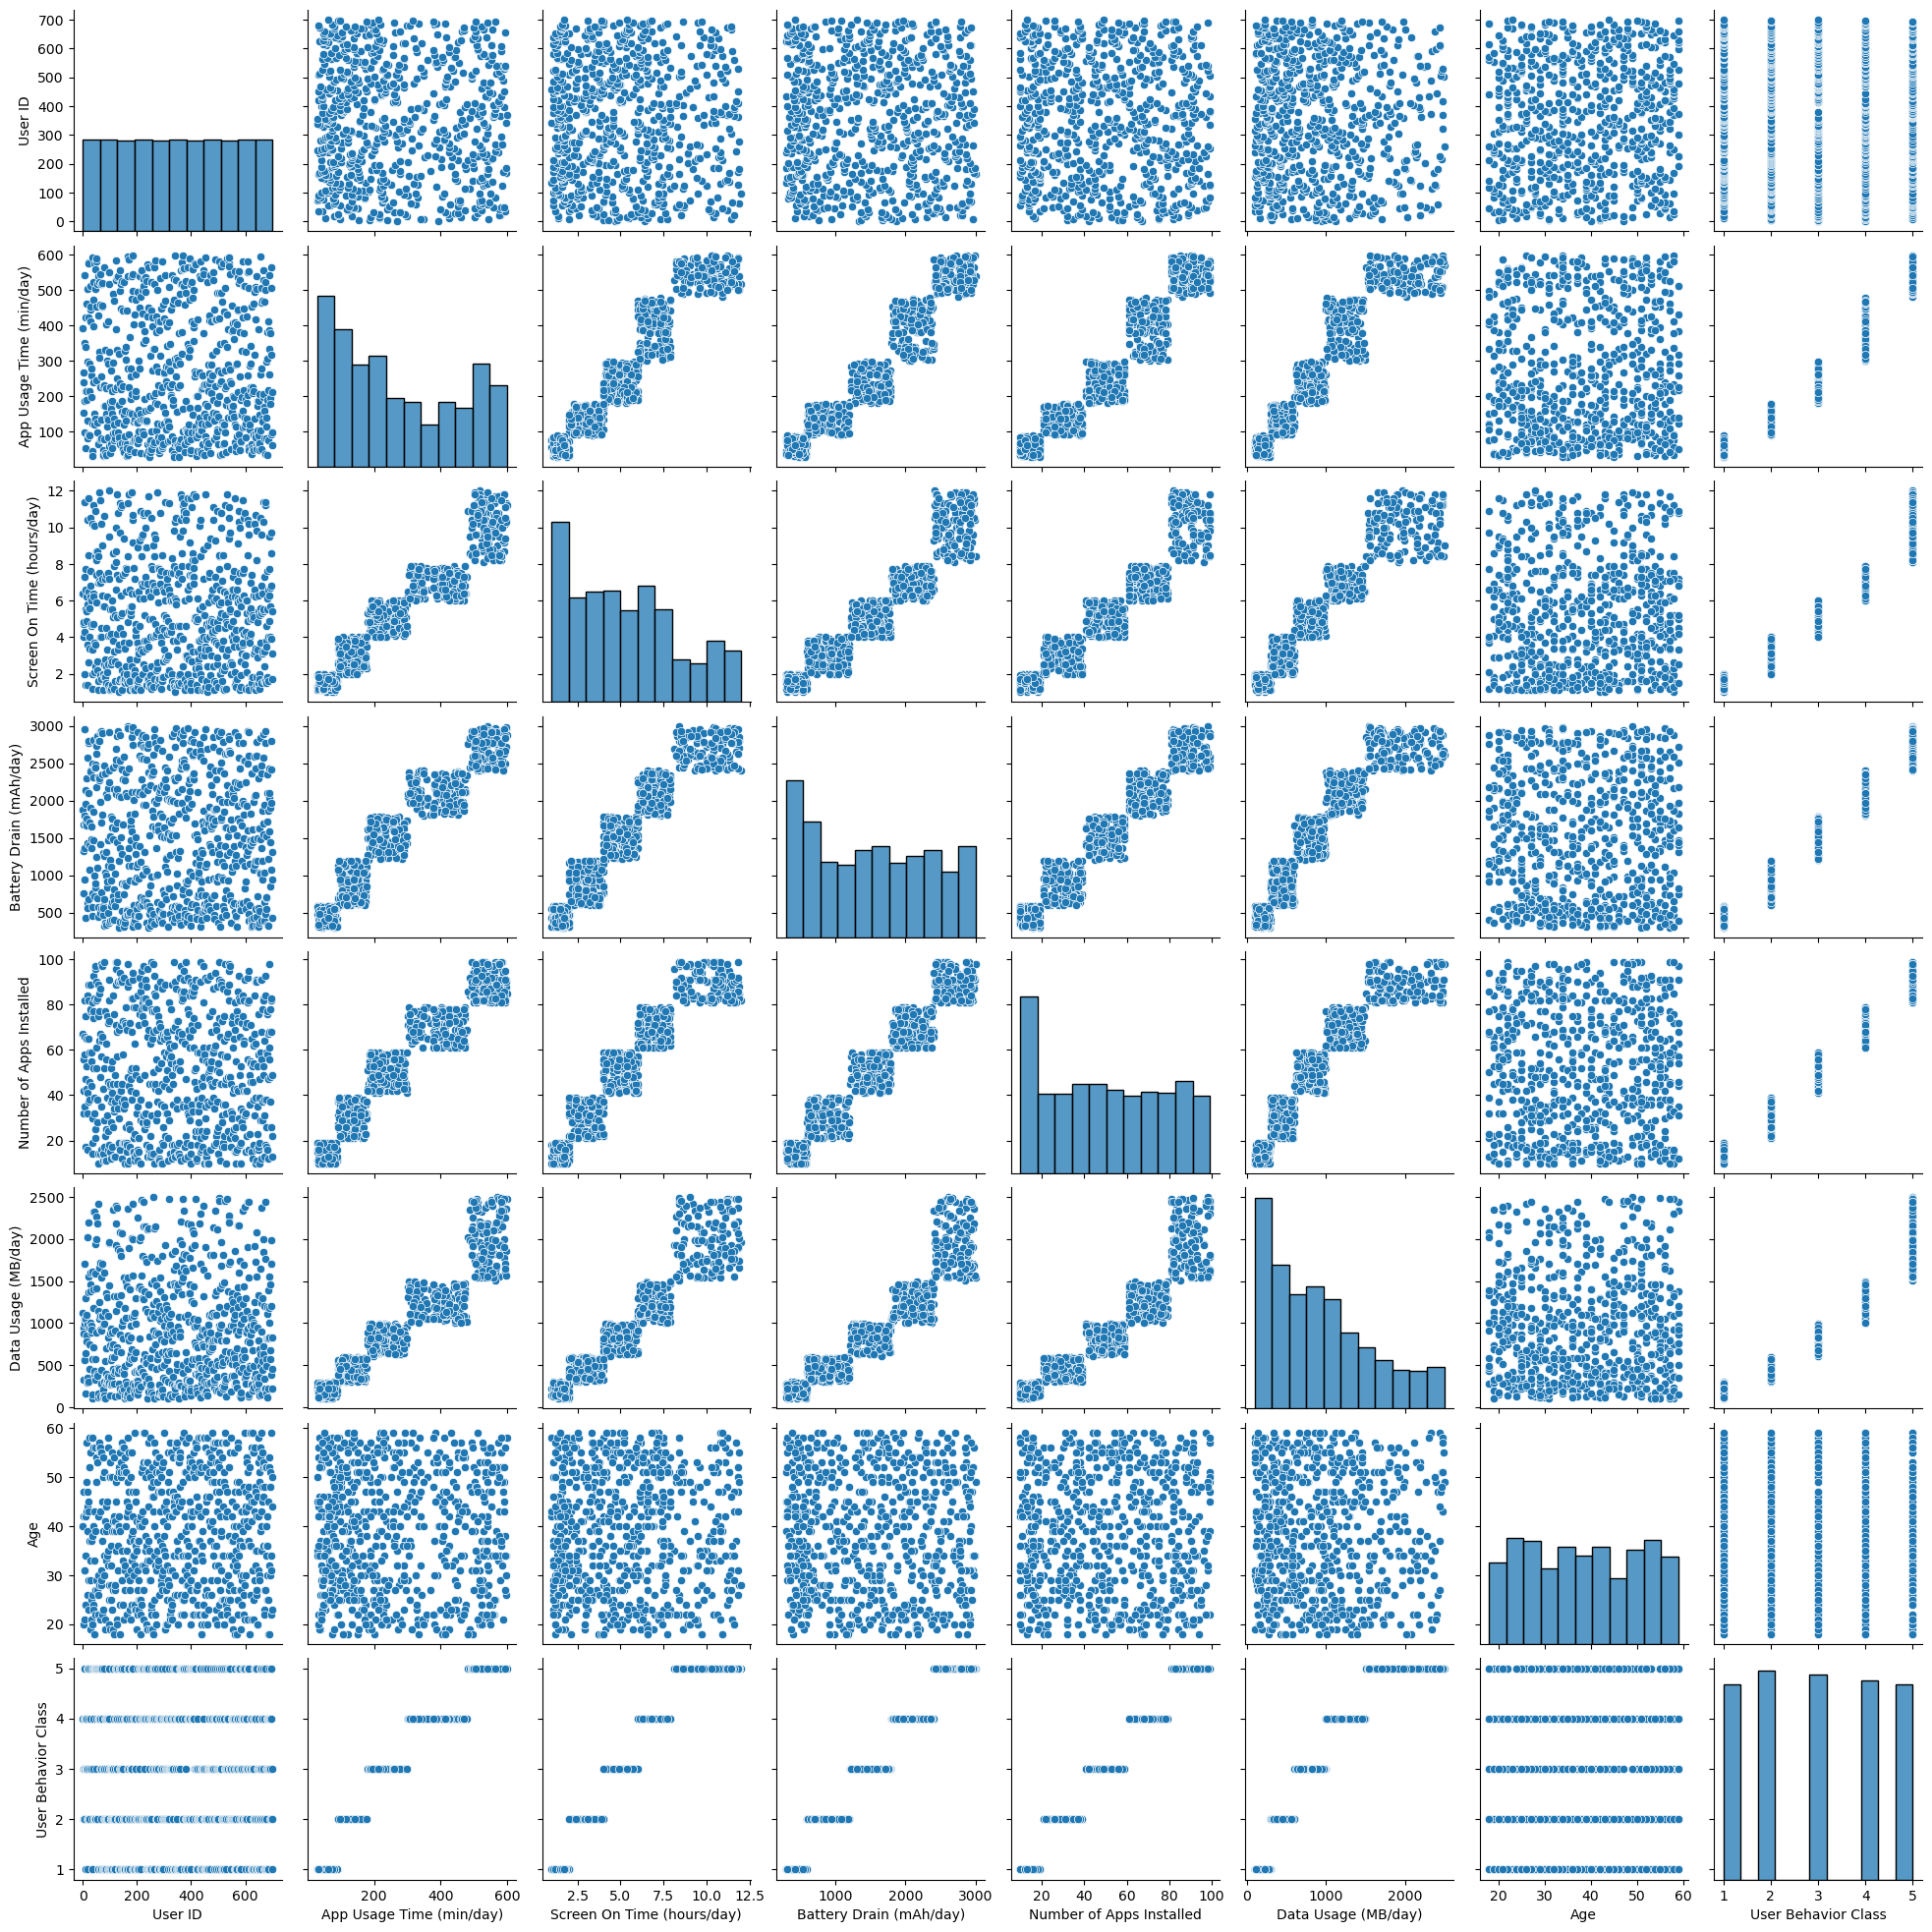

In [59]:
sns.pairplot(df)

In [ ]:
#  The Data seems very artificial and clear.. refused to make ml...
#   Though lots of interesting insights through visualization possible..